<a href="https://colab.research.google.com/github/mugaruram/EEwPython/blob/master/GAM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Force reinstall compatible versions of numpy and pygam
#!pip uninstall -y numpy
!pip install numpy # ==1.23.5
!pip install pygam --no-cache-dir


In [ ]:
# Step 1: Install required package
#!pip install pygam

In [ ]:
#!pip install --upgrade --force-reinstall pandas

R-squared: 0.0155
RMSE: 0.1791
MAE: 0.1415
AIC: 497.45
GCV: 0.06112
Scale: 0.0441
Pseudo R-squared: OrderedDict({'explained_deviance': np.float64(0.19914921954239606), 'McFadden': np.float64(0.7557616908959229), 'McFadden_adj': np.float64(0.22808424674579542)})


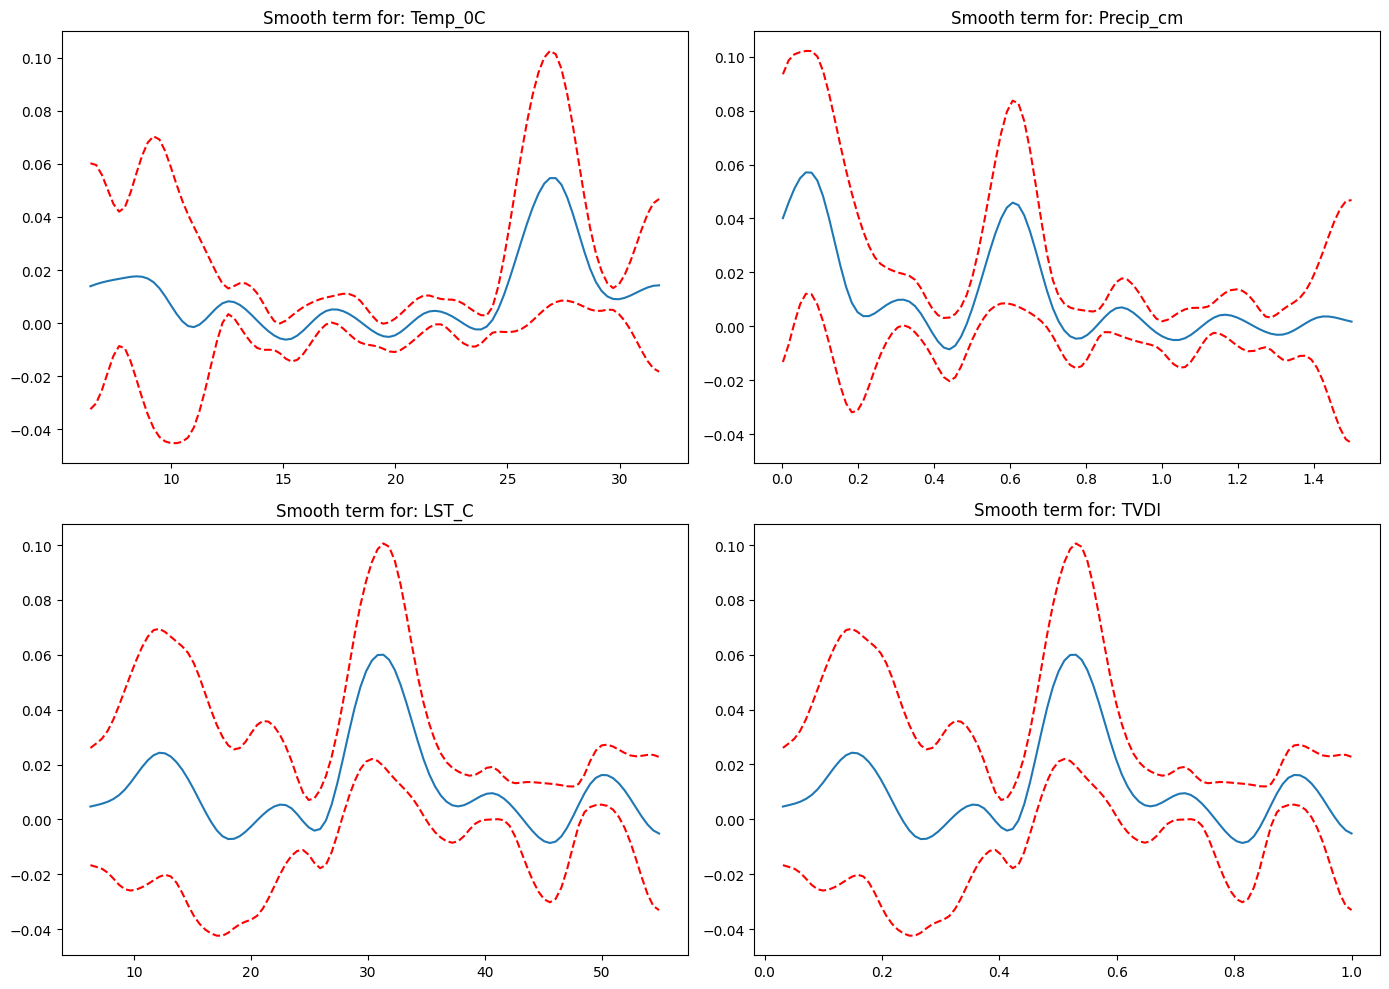

In [9]:
# Step 1: Install required package
#!pip install pygam

# Step 2: Import libraries
import pandas as pd
import numpy as np
from pygam import LinearGAM, s
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Step 3: Load your dataset
# Replace with the path to your uploaded file
df = pd.read_csv('/content/NDIV_LST_TDVI_EVI_ExData.csv')
df = df[['NDVI', 'Temp_0C', 'Precip_cm', 'LST_C', 'TVDI']].dropna()

# Step 4: Define features and target
X = df[['Temp_0C', 'Precip_cm', 'LST_C', 'TVDI']].values
y = df['NDVI'].values

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Fit the GAM model
gam = LinearGAM(s(0) + s(1) + s(2) + s(3)).fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = gam.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Step 8: Display performance metrics
#print(f'R-squared: {r2:.4f}')
#print(f'RMSE: {rmse:.4f}')
#print(f'MAE: {mae:.4f}')
#print(f'AIC: {gam.statistics_["AIC"]:.2f}')
#print(f'GCV: {gam.statistics_["GCV"]:.5f}')
#print(f'Scale: {gam.statistics_["scale"]:.4f}')
#print(f'Pseudo R-squared: {gam.statistics_["pseudo_r2"]:.4f}')

# Step 8: Display performance metrics
print(f'R-squared: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'AIC: {gam.statistics_["AIC"]:.2f}')
print(f'GCV: {gam.statistics_["GCV"]:.5f}')
print(f'Scale: {gam.statistics_["scale"]:.4f}')
print(f'Pseudo R-squared: {gam.statistics_["pseudo_r2"]}') # Remove the formatting for 'pseudo_r2'

# Step 9: Plot smooth terms
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for i, ax in enumerate(axs.flatten()):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=0.95)[1], c='r', ls='--')
    ax.set_title(f'Smooth term for: {df.columns[i+1]}')
plt.tight_layout()
plt.show()


In [ ]:
!pip install ace_tools

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Prepare data
X_rf = df[['Temp_0C', 'Precip_cm', 'LST_C', 'TVDI']]
y_rf = df['NDVI']

# Split data
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Fit RF model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Predict
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluate performance
r2_rf = r2_score(y_test_rf, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_rf, y_pred_rf))
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)

# Feature importance
feature_importances = rf_model.feature_importances_
rf_results_df = pd.DataFrame({
    'Metric': ['R-squared', 'RMSE', 'MAE'],
    'Value': [round(r2_rf, 4), round(rmse_rf, 4), round(mae_rf, 4)]
})

feature_importance_df = pd.DataFrame({
    'Feature': X_rf.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display results
#import ace_tools as tools; tools.display_dataframe_to_user(name="Random Forest Model Summary for NDVI Prediction", dataframe=rf_results_df)


In [11]:
from sklearn.ensemble import RandomForestRegressor

# ... (your existing code for data preparation, model fitting, and evaluation) ...

# Display results using print statements and pandas functions
print("Random Forest Model Summary for NDVI Prediction")
print("\n")  # Add an empty line for better readability

print(rf_results_df.to_string())  # Display the results DataFrame
print("\n")

print("Feature Importance:")
print(feature_importance_df.to_string()) # Display the feature importance DataFrame

Random Forest Model Summary for NDVI Prediction


      Metric   Value
0  R-squared -0.2092
1       RMSE  0.1985
2        MAE  0.1642


Feature Importance:
     Feature  Importance
0      LST_C    0.369424
1       TVDI    0.333949
2    Temp_0C    0.167816
3  Precip_cm    0.128811
